# Data Retrieval:

In [1]:
data = 'datatraining.txt'

In [2]:
import pandas as pd

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16, 4)})

In [4]:
occupancy = pd.read_csv(data, sep=',', decimal ='.')
occupancy

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1


In [5]:
#check data type:
occupancy.dtypes

date              object
Temperature      float64
Humidity         float64
Light            float64
CO2              float64
HumidityRatio    float64
Occupancy          int64
dtype: object

In [6]:
occupancy.shape

(8143, 7)

In [7]:
import numpy as np

In [8]:
#find min/max of the variables:
for i in occupancy.iloc[:,:]:
    print i, (np.min(occupancy.loc[:,i]), np.max(occupancy.loc[:,i]))

date ('2015-02-04 17:51:00', '2015-02-10 09:33:00')
Temperature (19.0, 23.18)
Humidity (16.745, 39.1175)
Light (0.0, 1546.33333333333)
CO2 (412.75, 2028.5)
HumidityRatio (0.00267412691390407, 0.00647601323671025)
Occupancy (0, 1)


In [9]:
#Check if the data has any NaN values:
occupancy.isnull().any()

date             False
Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

# Data Exploration

In [10]:
variables = np.array(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy'])
variables

array(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'], dtype='|S13')

In [11]:
import matplotlib.pyplot as plt

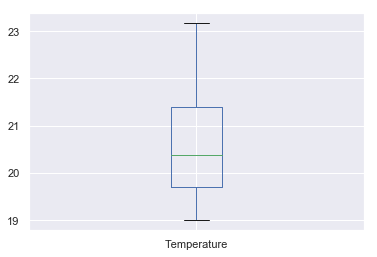

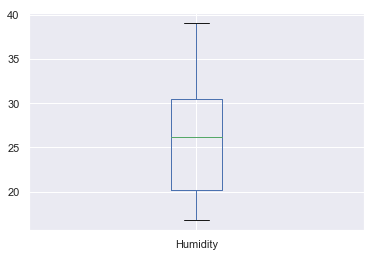

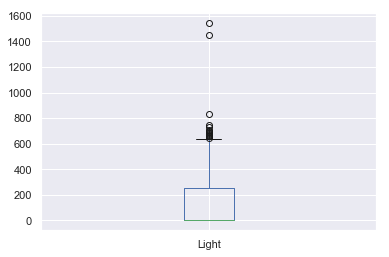

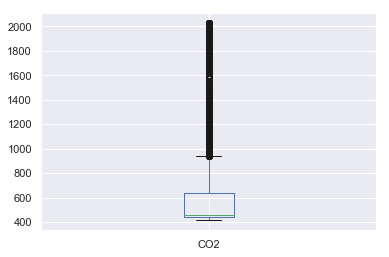

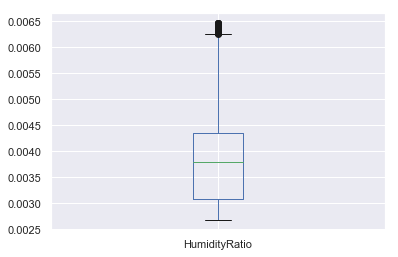

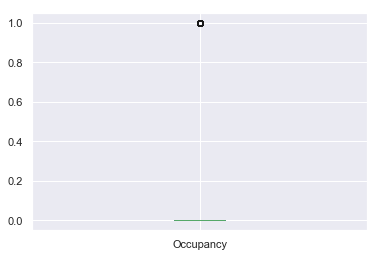

In [12]:
#Preliminary exploration: boxplot scan
for i in variables[1:,]:
    occupancy.boxplot(column=i)
    plt.show()

Text(0,0.5,'count')

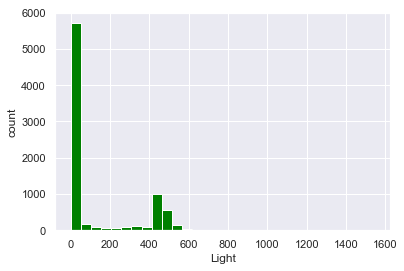

In [13]:
#Investigate the outliers/ influential points for light.
occupancy.dropna()['Light'].plot(kind='hist', bins = 30, color = 'green')
plt.xlabel("Light")
plt.ylabel("count")

In [14]:
from scipy import stats
z = np.abs(stats.zscore(occupancy['Light']))
z

array([1.57376283, 1.59173515, 1.57376283, ..., 1.60970748, 1.60970748,
       1.68159679])

In [15]:
type(occupancy['Light'])

pandas.core.series.Series

In [16]:
z.size

8143

In [17]:
outliers = np.where(z > 3)
print outliers

(array([1108, 1109, 1143, 3831, 3832, 3833], dtype=int64),)


In [18]:
len(outliers)

1

In [19]:
outliers

(array([1108, 1109, 1143, 3831, 3832, 3833], dtype=int64),)

In [20]:
type(outliers)

tuple

In [21]:
outliers[0].size

6

In [22]:
#Sort the Light values in descending order to see which value to cap the outliers at
#(this will be the max value after considering what is an outlier)

occupancy['Light'].sort_values().tail(10)

1147     676.000000
1145     686.250000
1113     688.500000
1107     696.500000
1110     708.750000
1144     732.750000
1109     744.000000
3834     829.000000
3833    1451.750000
3832    1546.333333
Name: Light, dtype: float64

In [23]:
#Clean the data from the Light outliers
light_check = occupancy['Light']> 708
occupancy.loc[light_check, 'Light'] = 696.5

Text(0,0.5,'count')

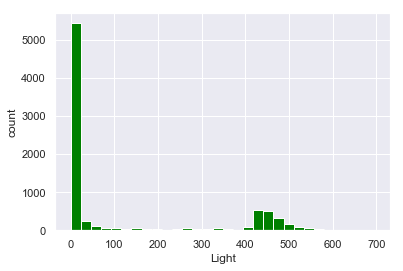

In [24]:
#Regraph
occupancy.dropna()['Light'].plot(kind='hist', bins = 30, color = 'green')
plt.xlabel("Light")
plt.ylabel("count")

Text(0,0.5,'count')

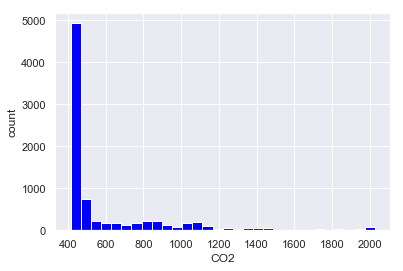

In [25]:
# CO2 exploration
occupancy.dropna()['CO2'].plot(kind='hist', bins = 30, color = 'blue')
plt.xlabel("CO2")
plt.ylabel("count")

In [26]:
z2 = np.abs(stats.zscore(occupancy['CO2']))
outliers2 = np.where(z2 > 3)
print outliers2
## Many outliers - graph looks to be positively skewed.

(array([7024, 7025, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034,
       7035, 7036, 7037, 7038, 7039, 7040, 7041, 7042, 7043, 7044, 7045,
       7046, 7047, 7048, 7049, 7050, 7051, 7052, 7053, 7054, 7055, 7056,
       7057, 7058, 7059, 7060, 7061, 7062, 7063, 7064, 7065, 7066, 7067,
       7068, 7069, 7070, 7071, 7072, 7073, 7074, 7075, 7076, 7077, 7078,
       7079, 7080, 7081, 7082, 7083, 7084, 7085, 7086, 7087, 7088, 7089,
       7090, 7091, 7092, 7093, 7094, 7095, 7096, 7097, 7098, 7099, 7100,
       7101, 7102, 7103, 7104, 7105, 7106, 7107, 7108, 7109, 7110, 7111,
       7112, 7113, 7114, 7115, 7116, 7117, 7118, 7119, 7120, 7121, 7122,
       7123, 7124, 7125, 7126, 7127, 7128, 7129, 7130, 7131, 7132, 7133,
       7134, 7135, 7136, 7137, 7138, 7139, 7140, 7141, 7142, 7143, 7144,
       7145, 7146, 7147, 7148, 7149, 7150, 7151, 7152, 7153, 7154, 7155,
       7156, 7157, 7158, 7159, 7160, 7161, 7162, 7163, 7164, 7165, 7166,
       7167, 7168, 7169, 7170, 7171, 7172, 7173, 7

Text(0,0.5,'count')

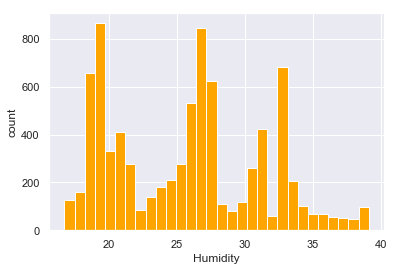

In [52]:
# Humidity exploration
occupancy.dropna()['Humidity'].plot(kind='hist', bins = 30, color = 'orange')
plt.xlabel("Humidity")
plt.ylabel("count")
# highest frequencies appear to be around ~19%, ~27% and ~33%.

In [51]:
z3 = np.abs(stats.zscore(occupancy['Humidity']))
outliers3 = np.where(z3 > 3)
print outliers3[0]
# no outliers. hooray!

[]


Text(0,0.5,'count')

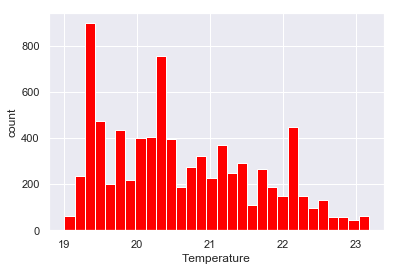

In [56]:
# Temperature exploration
occupancy.dropna()['Temperature'].plot(kind='hist', bins = 30, color = 'red')
plt.xlabel("Temperature")
plt.ylabel("count")
# high frequencies around ~19.3, 20.3 and 22.1.

In [57]:
z4 = np.abs(stats.zscore(occupancy['Temperature']))
outliers4 = np.where(z4 > 3)
print outliers4[0]
# again, no outliers.

[]


Text(0,0.5,'Humidity')

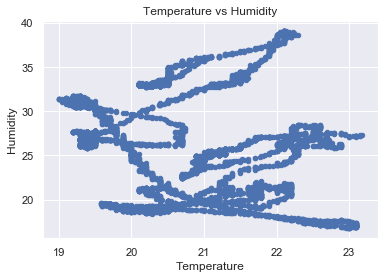

In [28]:
#Temperature versus humdity
occupancy.plot(kind = 'scatter', x=1,y=2)
plt.title("Temperature vs Humidity")
plt.xlabel('Temperature')
plt.ylabel('Humidity')

Text(0,0.5,'Humidity Ratio')

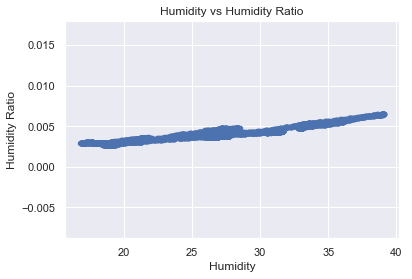

In [29]:
occupancy.plot(kind = 'scatter', x=2,y=5)
plt.title("Humidity vs Humidity Ratio")
plt.xlabel('Humidity')
plt.ylabel('Humidity Ratio')

Text(0,0.5,'Co2')

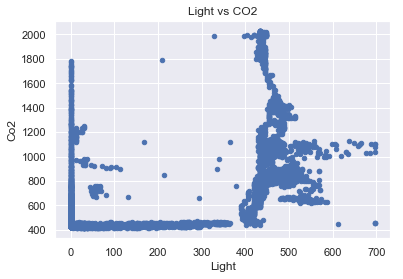

In [30]:
occupancy.plot(kind = 'scatter', x=3,y=4)
plt.title("Light vs CO2")
plt.xlabel('Light')
plt.ylabel('Co2')

Text(0,0.5,'Temperature')

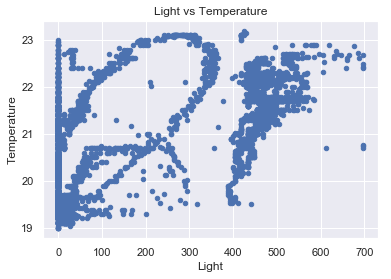

In [31]:
occupancy.plot(kind = 'scatter', x=3,y=1)
plt.title("Light vs Temperature")
plt.xlabel('Light')
plt.ylabel('Temperature')

Text(0,0.5,'Humidity')

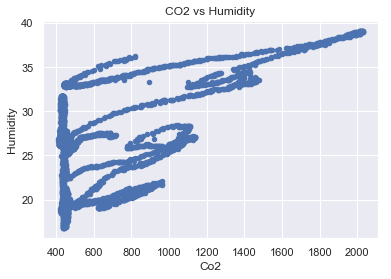

In [32]:
occupancy.plot(kind = 'scatter', x=4,y=2)
plt.title("CO2 vs Humidity")
plt.xlabel('Co2')
plt.ylabel('Humidity')

In [65]:
# set up a scatter matrix of all variables excluding time:
from pandas.plotting import scatter_matrix
occupancy_minus_time = occupancy[['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']]

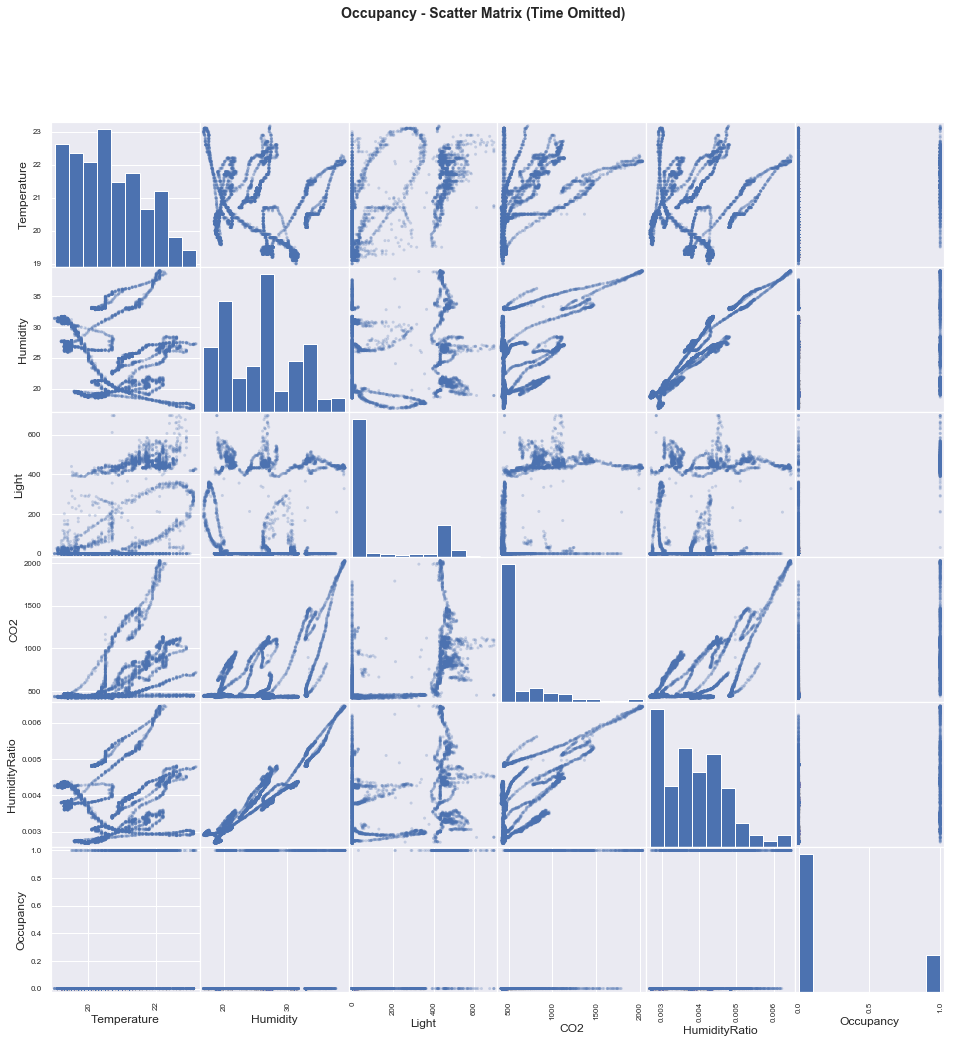

In [71]:
scatter_matrix(occupancy_minus_time, alpha=0.25, figsize=(16, 16),  diagonal='hist')
plt.suptitle('Occupancy - Scatter Matrix (Time Omitted)', fontsize=14, fontweight="bold")
# i don't know why there's such a large space between the title and the graph...
plt.show()

In [ ]:
## to do: plot time against all other variables. not quite sure how to do this.

In [35]:
#Time variable will need to be changed into date-time for the data model.
time = pd.to_datetime(occupancy['date'])
time.dtypes
pd.to_datetime(occupancy['date'])
occupancy['date'].dtypes

dtype('O')

In [36]:
# Now to explore Date-time variable:

In [37]:
#Create new pandas series data frame with Date-Time object as index:
time_Index_data = occupancy
time_Index_data['date'] = pd.to_datetime(time_Index_data['date'])

time_Index_data = time_Index_data.set_index('date')
time_Index_data

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1


In [38]:
time_Index_data.index

DatetimeIndex(['2015-02-04 17:51:00', '2015-02-04 17:51:59',
               '2015-02-04 17:53:00', '2015-02-04 17:54:00',
               '2015-02-04 17:55:00', '2015-02-04 17:55:59',
               '2015-02-04 17:57:00', '2015-02-04 17:57:59',
               '2015-02-04 17:58:59', '2015-02-04 18:00:00',
               ...
               '2015-02-10 09:23:59', '2015-02-10 09:24:59',
               '2015-02-10 09:26:00', '2015-02-10 09:27:00',
               '2015-02-10 09:28:00', '2015-02-10 09:29:00',
               '2015-02-10 09:29:59', '2015-02-10 09:30:59',
               '2015-02-10 09:32:00', '2015-02-10 09:33:00'],
              dtype='datetime64[ns]', name=u'date', length=8143, freq=None)

In [39]:
#resample data at hourly frequency
time_Index_data['Light'].resample('H').mean()  #To mention in discusssion: if we resampled at a lower frequency (i.e hourly, some data might have been lost in modelling)

date
2015-02-04 17:00:00    423.277778
2015-02-04 18:00:00     48.875000
2015-02-04 19:00:00      0.000000
2015-02-04 20:00:00      0.000000
2015-02-04 21:00:00      0.000000
2015-02-04 22:00:00      0.000000
2015-02-04 23:00:00      0.000000
2015-02-05 00:00:00      0.000000
2015-02-05 01:00:00      0.000000
2015-02-05 02:00:00      0.000000
2015-02-05 03:00:00      0.000000
2015-02-05 04:00:00      0.000000
2015-02-05 05:00:00      0.000000
2015-02-05 06:00:00      0.000000
2015-02-05 07:00:00    153.568852
2015-02-05 08:00:00    428.956497
2015-02-05 09:00:00    476.809722
2015-02-05 10:00:00    458.602459
2015-02-05 11:00:00    452.514124
2015-02-05 12:00:00    569.229722
2015-02-05 13:00:00    317.834973
2015-02-05 14:00:00    467.630508
2015-02-05 15:00:00    481.280556
2015-02-05 16:00:00    442.478142
2015-02-05 17:00:00    433.500000
2015-02-05 18:00:00     32.300000
2015-02-05 19:00:00      0.000000
2015-02-05 20:00:00      0.000000
2015-02-05 21:00:00      0.000000
2015-02-0

Text(0,0.5,'Light (lux)')

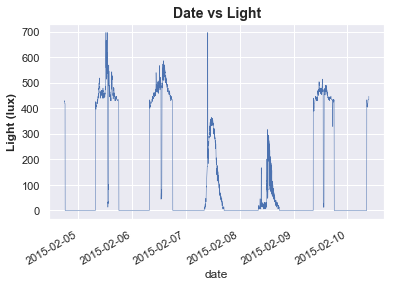

In [40]:
time_Index_data['Light'].plot(linewidth=0.5)
plt.title("Date vs Light",fontweight="bold", fontsize = 14)
plt.ylabel('Light (lux)', fontweight="bold", fontsize = 12)

In [41]:
Light = time_Index_data.loc[index > 2015-02-05, 'date'].sort_values()

NameError: name 'index' is not defined

In [ ]:
Light = occupancy.loc['Light'].sort_values() #Gives 688.5 as next highest value behind max
Light
Light[Light == 688.5].index[0]  # <- This max value is at index, 1113 
occupancy.loc[1113,'date']

In [ ]:
#Light spike at 8/2 seems to be an anomaly/ outlier. Treat by replacement.
#find min/max of the variables:
print np.max(occupancy.loc[:,'Light'])  #Gives 688.5 as max value
Light = occupancy['Light']
Light[Light == 696.5].index[0]  # <- This max value is at index, 1107
occupancy.loc[1107,'date']

In [ ]:
#Plot time vs. temperature
time_Index_data['Temperature'].plot(linewidth=0.5)
plt.title("Date vs Temperature",fontweight="bold", fontsize = 14)
plt.ylabel('Temperature (oC)', fontweight="bold", fontsize = 12)


In [ ]:
#Plot time vs. humidity
time_Index_data['Humidity'].plot(linewidth=0.5)
plt.title("Date vs Humidity",fontweight="bold", fontsize = 14)
plt.ylabel('Relative Humdity(%)', fontweight="bold", fontsize = 12)

In [ ]:
#Plot time vs. CO2
time_Index_data['CO2'].plot(linewidth=0.5)
plt.title("Date vs CO2",fontweight="bold", fontsize = 14)
plt.ylabel('CO2 (ppm)', fontweight="bold", fontsize = 12)

In [ ]:
#CO2 versus temperature
occupancy.plot(kind = 'scatter', x=1,y=2)
plt.title("CO2 vs temperature")
plt.xlabel('CO2')
plt.ylabel('Temperature')

In [ ]:
#choose variables to use
VarsModel = occupancy[["CO2", "Temperature", "Humidity", "Light"]]
Target =occupancy["Occupancy"]

# Data Model - Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(VarsModel,Target, test_size = 0.4, random_state = 0)

In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
y_train

In [ ]:
y_train.shape

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
y_pre

In [ ]:
y_pre.shape

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pre)
print cm

In [ ]:
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

In [ ]:
initial_array = np.ones(shape = (2,2))

# Create array of arrays
array_of_arrays = np.ndarray(shape = (1,), dtype = "object")
array_of_arrays[0] = initial_array

In [ ]:
#Create arrays 'feature_names' and 'target_names' which can be used by the graphviz program
Ofeature_names = np.array(["CO2", "Temperature", "Humidity", "Light"])
Ofeature_names
type(Ofeature_names)

In [ ]:
Otarget_names = np.array(["not occupied", "occupied"])

In [ ]:
from sklearn import tree
with open('Occupancy.dot','w') as f: f = tree.export_graphviz(clf, out_file=f, feature_names = Ofeature_names, class_names = Otarget_names, filled=True, rounded =True, special_characters=True)

# Data Model - K nearest neighbours:

In [ ]:
X_train2, X_test2, y_train2, y_test2 = 